In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

pd.set_option('display.max_columns', None)
plt.rcParams['figure.figsize'] = (12,6)

# Predicting Phishing Web Page Using Machine Learning

In this notebook, we will examine the data and determine which characteristics can provide us with information about the characteristics of a phishing website.

In this notebook, we will read the data and look at what are the features that can give us information on what are the attributes of a phishing website

# Loading the data

We will start by loading the provided csv data using pandas read_csv method

In [ ]:
data = pd.read_csv("D:\Downloads\archive\Phishing_Legitimate_full.csv")

# Convert data 

This step involves converting float64 and int64 data to type 32 in order to conserve memory and get the data ready for use in CuML training later on.
 As we can see, there are 10,000 rows and 50 columns in the data, along with labels.

In [ ]:
float_cols = data.select_dtypes('float64').columns
for c in float_cols:
    data[c] = data[c].astype('float32')
    
int_cols = data.select_dtypes('int64').columns
for c in int_cols:
    data[c] = data[c].astype('int32')
    
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 50 columns):
 #   Column                              Non-Null Count  Dtype  
---  ------                              --------------  -----  
 0   id                                  10000 non-null  int32  
 1   NumDots                             10000 non-null  int32  
 2   SubdomainLevel                      10000 non-null  int32  
 3   PathLevel                           10000 non-null  int32  
 4   UrlLength                           10000 non-null  int32  
 5   NumDash                             10000 non-null  int32  
 6   NumDashInHostname                   10000 non-null  int32  
 7   AtSymbol                            10000 non-null  int32  
 8   TildeSymbol                         10000 non-null  int32  
 9   NumUnderscore                       10000 non-null  int32  
 10  NumPercent                          10000 non-null  int32  
 11  NumQueryComponents                  10000 

In [ ]:
data.rename(columns={'CLASS_LABEL': 'labels'}, inplace=True)

# View the data

Let's examine five rows at random from the dataset. It appears that the data is mixed, with some columns having a smaller range than others.

In [ ]:
data.sample(5)

,id,NumDots,SubdomainLevel,PathLevel,UrlLength,NumDash,NumDashInHostname,AtSymbol,TildeSymbol,NumUnderscore,NumPercent,NumQueryComponents,NumAmpersand,NumHash,NumNumericChars,NoHttps,RandomString,IpAddress,DomainInSubdomains,DomainInPaths,HttpsInHostname,HostnameLength,PathLength,QueryLength,DoubleSlashInPath,NumSensitiveWords,EmbeddedBrandName,PctExtHyperlinks,PctExtResourceUrls,ExtFavicon,InsecureForms,RelativeFormAction,ExtFormAction,AbnormalFormAction,PctNullSelfRedirectHyperlinks,FrequentDomainNameMismatch,FakeLinkInStatusBar,RightClickDisabled,PopUpWindow,SubmitInfoToEmail,IframeOrFrame,MissingTitle,ImagesOnlyInForm,SubdomainLevelRT,UrlLengthRT,PctExtResourceUrlsRT,AbnormalExtFormActionR,ExtMetaScriptLinkRT,PctExtNullSelfRedirectHyperlinksRT,labels
7563,7564,1,0,6,74,2,0,0,0,0,0,0,0,0,8,1,1,0,0,1,0,21,46,0,0,0,0,0.270270,0.512500,0,1,0,1,0,0.000000,0,0,0,0,1,1,0,0,1,0,-1,0,0,1,0
1358,1359,1,0,6,59,1,0,0,0,0,0,0,0,0,0,1,1,0,0,1,0,15,37,0,0,0,0,0.000000,0.000000,0,1,1,0,0,1.000000,0,0,0,0,0,0,0,0,1,0,1,1,1,-1,1
2793,2794,3,0,4,72,0,0,0,0,0,0,0,0,0,1,1,1,0,0,1,0,22,43,0,0,0,0,0.000000,0.750000,0,1,0,0,0,0.000000,1,0,0,0,0,0,0,0,1,0,0,1,-1,1,1
8052,8053,1,0,5,104,9,0,0,0,0,0,0,0,0,8,1,1,0,0,1,0,21,76,0,0,0,0,0.930288,0.666667,0,1,0,1,0,0.002404,1,0,0,0,0,1,0,0,1,-1,0,0,0,-1,0
6578,6579,1,0,2,80,1,0,0,0,0,3,1,0,0,8,1,1,0,0,0,0,9,14,49,0,0,0,0.019900,0.181818,0,1,1,0,0,0.000000,0,0,0,0,0,1,0,0,1,-1,0,1,1,1,0


# Summary Statistics

Using the describe technique, we can observe that some of the columns have a higher variance than others. This is because some of the columns have larger values and ranges.

In [ ]:
data.describe()

,id,NumDots,SubdomainLevel,PathLevel,UrlLength,NumDash,NumDashInHostname,AtSymbol,TildeSymbol,NumUnderscore,NumPercent,NumQueryComponents,NumAmpersand,NumHash,NumNumericChars,NoHttps,RandomString,IpAddress,DomainInSubdomains,DomainInPaths,HttpsInHostname,HostnameLength,PathLength,QueryLength,DoubleSlashInPath,NumSensitiveWords,EmbeddedBrandName,PctExtHyperlinks,PctExtResourceUrls,ExtFavicon,InsecureForms,RelativeFormAction,ExtFormAction,AbnormalFormAction,PctNullSelfRedirectHyperlinks,FrequentDomainNameMismatch,FakeLinkInStatusBar,RightClickDisabled,PopUpWindow,SubmitInfoToEmail,IframeOrFrame,MissingTitle,ImagesOnlyInForm,SubdomainLevelRT,UrlLengthRT,PctExtResourceUrlsRT,AbnormalExtFormActionR,ExtMetaScriptLinkRT,PctExtNullSelfRedirectHyperlinksRT,labels
count,10000.00000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000,10000.0,10000.00000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.0000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000
mean,5000.50000,2.445100,0.586800,3.300300,70.264100,1.818000,0.138900,0.000300,0.013100,0.32320,0.073800,0.458600,0.277200,0.002300,5.810300,0.988800,0.52520,0.017200,0.022200,0.428900,0.0,18.82430,35.564900,8.606500,0.000900,0.109300,0.057100,0.241334,0.392932,0.167200,0.844000,0.248700,0.1018,0.057600,0.136136,0.215300,0.005500,0.014000,0.004900,0.128800,0.339600,0.03220,0.030400,0.956600,0.020200,0.353300,0.793200,0.173400,0.314100,0.500000
std,2886.89568,1.346836,0.751214,1.863241,33.369877,3.106258,0.545744,0.017319,0.113709,1.11466,0.622248,1.344793,1.117356,0.047906,9.617877,0.105241,0.49939,0.130023,0.147341,0.494944,0.0,8.11654,24.588502,24.313053,0.029988,0.368737,0.232045,0.342370,0.387292,0.373173,0.362873,0.432281,0.3024,0.232997,0.312413,0.411051,0.073961,0.117496,0.069832,0.334995,0.473597,0.17654,0.171694,0.248037,0.820036,0.888908,0.521019,0.755771,0.897843,0.500025
min,1.00000,1.000000,0.000000,0.000000,12.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.0,4.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,0.000000
25%,2500.75000,2.000000,0.000000,2.000000,48.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.00000,0.000000,0.000000,0.000000,0.0,14.00000,18.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.030303,0.000000,1.000000,0.000000,0.0000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,1.000000,-1.000000,-1.000000,1.000000,0.000000,-1.000000,0.000000
50%,5000.50000,2.000000,1.000000,3.000000,62.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,2.000000,1.000000,1.00000,0.000000,0.000000,0.000000,0.0,18.00000,30.000000,0.000000,0.000000,0.000000,0.000000,0.071429,0.247511,0.000000,1.000000,0.000000,0.0000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,1.000000,0.000000,1.000000,1.000000,0.000000,1.000000,0.500000
75%,7500.25000,3.000000,1.000000,4.000000,84.000000,2.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,8.000000,1.000000,1.00000,0.000000,0.000000,1.000000,0.0,22.00000,48.000000,0.000000,0.000000,0.000000,0.000000,0.315874,0.785714,0.000000,1.000000,0.000000,0.0000,0.000000,0.047619,0.000000,0.000000,0.000000,0.000

# Balance/Imbalanced Data

The data is balanced for non-phising and phising label

<AxesSubplot:>

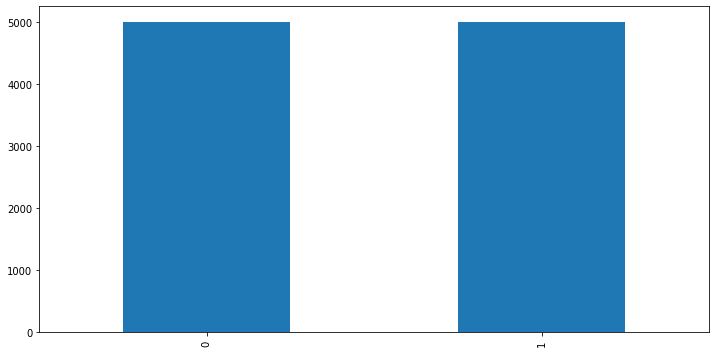

In [ ]:
data['labels'].value_counts().plot(kind='bar')

# Spearman Correlation

By looking the spearman correlation, we can find which features are linearly correlated in terms of predicting if a site is phising or not

In [ ]:
def corr_heatmap(data, idx_s, idx_e):
    y = data['labels']
    temp = data.iloc[:, idx_s:idx_e]
    if 'id' in temp.columns:
        del temp['id']
    temp['labels'] = y
    sns.heatmap(temp.corr(), annot=True, fmt='.2f')
    plt.show()

# First 10 columns

We can determine that none of the features have a substantial link with the labels by comparing the first ten columns to the labels. However, NumDash has a large negative effect on the labels, which may indicate that a site is more likely to be a phishing site if there are fewer dashes.

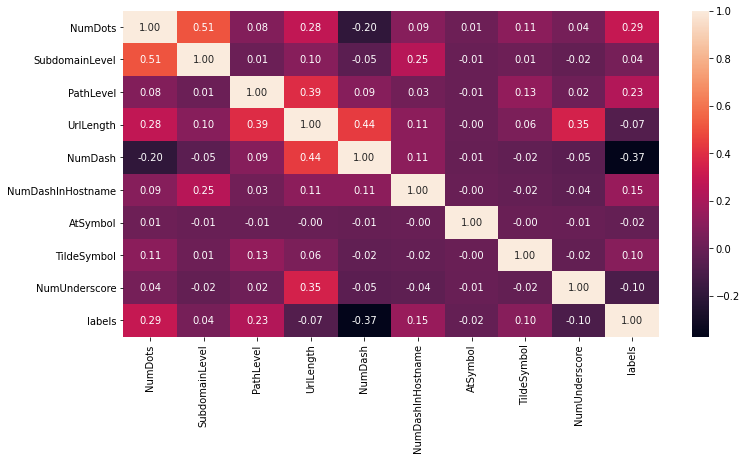

In [ ]:
corr_heatmap(data, 0, 10)

# Columns 10 to 20

There are no strong or even medium level strength correlation features with labels

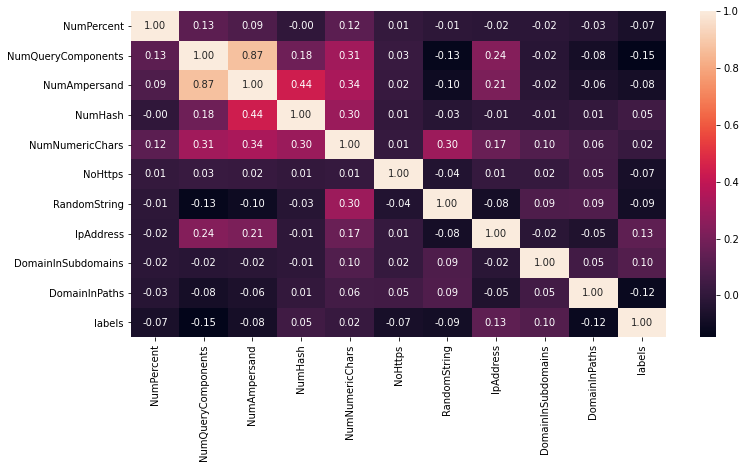

In [ ]:
corr_heatmap(data, 10, 20)

# Columns 20 to 30

Still no strong correlation feature

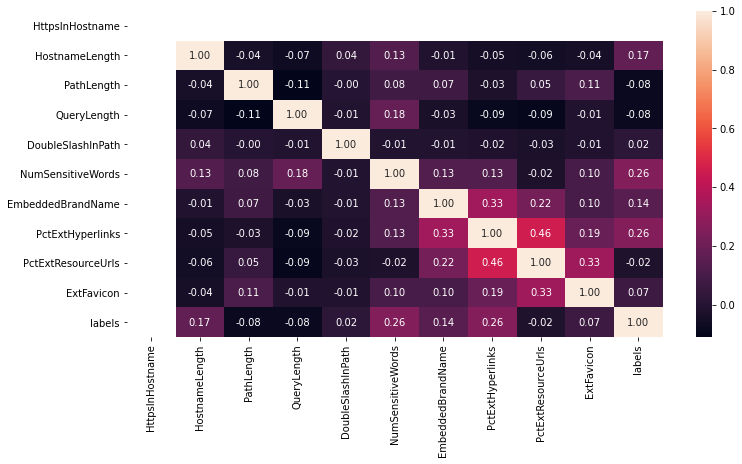

In [ ]:
corr_heatmap(data, 20, 30)

# Columns 30 to 40

Here are several characteristics that have a linear relationship with our dependent variable.

* InsecureForms indicates that the likelihood of a website being a phishing site increases with a higher value.
* InsecureForms and PctNullSelfRedirectHyperlinks exhibit the same positive association.
* FequentDomainNameMismatch indicates a positive, medium linear association.
* According to SubmitInfoToEmail, websites that request users to send their personal information to emails appear to have a higher risk of phishing.

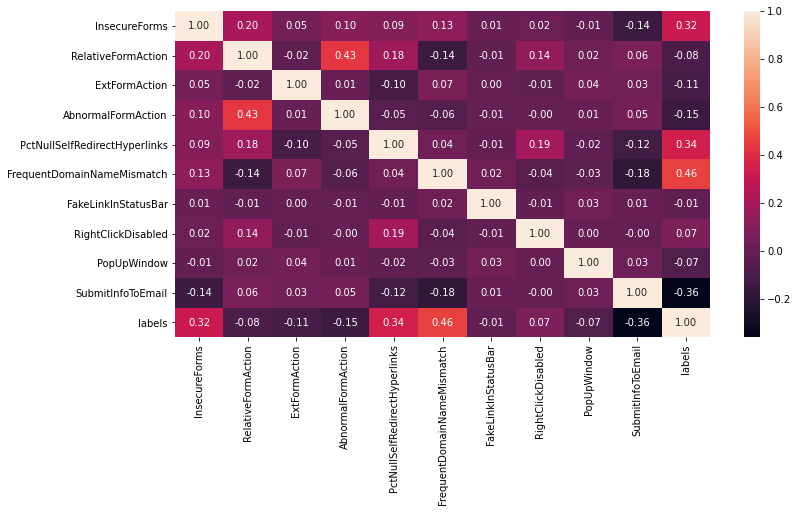

In [ ]:
corr_heatmap(data, 30, 40)

# Columsn 40 to 50

PctExtNullSelfRedirectHyperlinksRT is the only column in this group that exhibits some association with labels. It has a negative influence on labels, which may indicate that the likelihood of phishing grows as the percentage of null self-redirect hyperlinks increases.

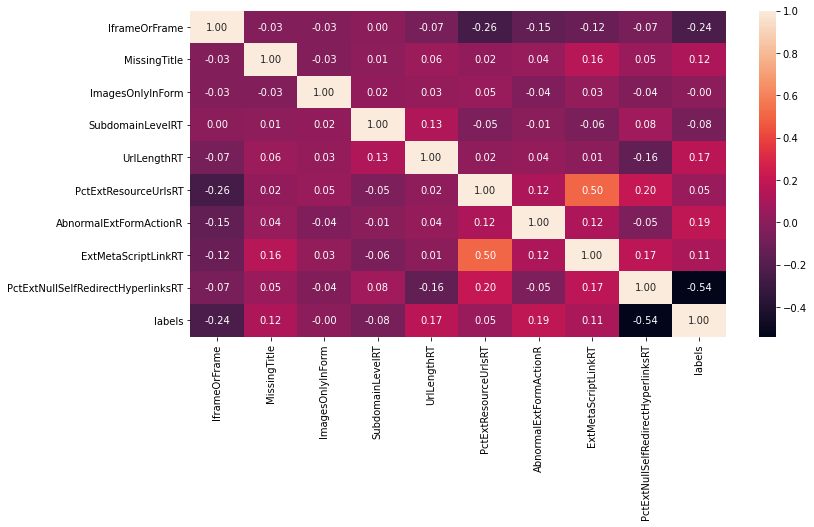

In [ ]:
corr_heatmap(data, 40, 50)

# Mutual Info

We will use mutual info classifier to find non linear and linear correlation betweem the features and labels

In [ ]:
from sklearn.feature_selection import mutual_info_classif

In [ ]:
X = data.drop(['id', 'labels'], axis=1)
y = data['labels']

In [ ]:
discrete_features = X.dtypes == int

Here we process the scores and we can see that now mutual info is showing a bit different list from spearman corr

In [ ]:
mi_scores = mutual_info_classif(X, y, discrete_features=discrete_features)
mi_scores = pd.Series(mi_scores, name='MI Scores', index=X.columns)
mi_scores = mi_scores.sort_values(ascending=False)
mi_scores

PctExtHyperlinks                      0.466468
PctExtResourceUrls                    0.287948
PctNullSelfRedirectHyperlinks         0.224680
PctExtNullSelfRedirectHyperlinksRT    0.218247
NumNumericChars                       0.131774
FrequentDomainNameMismatch            0.124296
ExtMetaScriptLinkRT                   0.121077
NumDash                               0.110516
SubmitInfoToEmail                     0.080530
NumDots                               0.062004
PathLength                            0.058226
InsecureForms                         0.051746
PathLevel                             0.050815
QueryLength                           0.047440
NumSensitiveWords                     0.042470
UrlLength                             0.040701
IframeOrFrame                         0.027984
PctExtResourceUrlsRT                  0.025875
NumQueryComponents                    0.024486
UrlLengthRT                           0.022790
HostnameLength                        0.017741
AbnormalExtFo

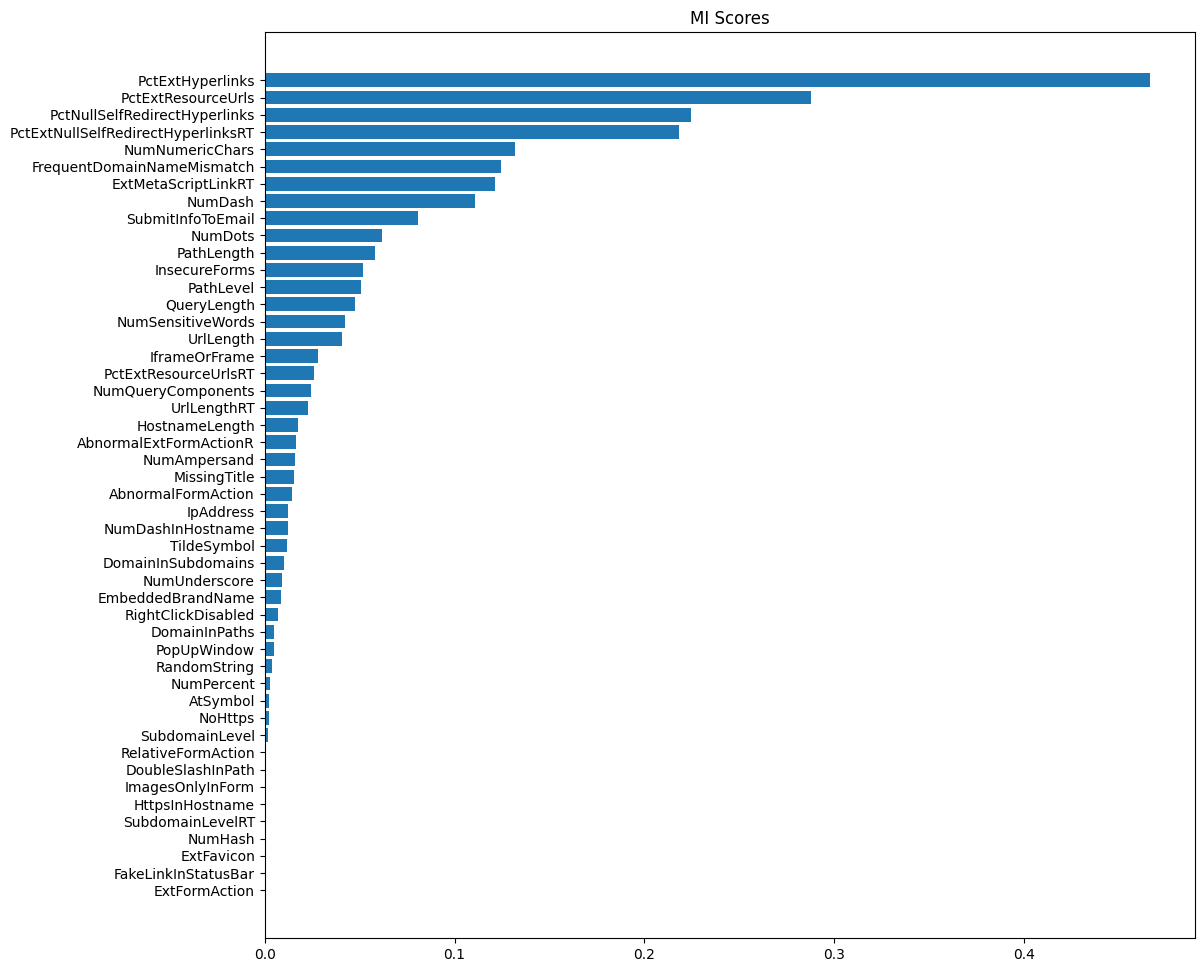

In [ ]:
def plot_mi_scores(scores):
    scores = scores.sort_values(ascending=True)
    width = np.arange(len(scores))
    ticks = list(scores.index)
    plt.barh(width, scores)
    plt.yticks(width, ticks)
    plt.title("MI Scores")
    
plt.figure(dpi=100, figsize=(12,12))
plot_mi_scores(mi_scores)

# Prediction

First, logistic regression will be used as the baseline. Next, we will utilize a random forest classifier to attempt to surpass the baseline.

We will use accuracy, precision, recall, and f1 score as our evaluation measures.

We import all necessary modules below.

In [ ]:
from sklearn.linear_model import LogisticRegression
#from cuml.ensemble import RandomForestClassifier as cuRfc
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Train logistic models

This technique uses a logistic regression model to perform a repetitive training process. The goal is to determine the ideal number of features to use in order to find the best-fitting model without changing many hyperparameters, which is why data-centric training is the preferred approach. In essence, the method uses the top N features to train the model and returns all evaluation metrics for evaluation purposes.

In [ ]:
def train_logistic(data, top_n):
    top_n_features = mi_scores.sort_values(ascending=False).head(top_n).index.tolist()
    X = data[top_n_features]
    y = data['labels']
    
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=True)
    
    lr = LogisticRegression(max_iter=10000)
    lr.fit(X_train, y_train)
    
    y_pred = lr.predict(X_test)
    
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    accuracy = accuracy_score(y_test, y_pred)
    
    return precision, recall, f1, accuracy

Here the loop will be starting from 20 as we will start training with top 20 features up to all 50 features to find optimal number of features needed for this problem

In [ ]:
arr = []
for i in range(20,51,1):
    precision, recall, f1, accuracy = train_logistic(data, i)
    print("Performance for Logistic Model with Top {} features is precision : {}, recall : {}, f1 score : {}, accuracy : {}".format(i, precision, recall, f1, accuracy))
    arr.append([i, precision, recall, f1, accuracy])

Performance for Logistic Model with Top 20 features is precision : 0.9185929648241206, recall : 0.9326530612244898, f1 score : 0.9255696202531645, accuracy : 0.9265
Performance for Logistic Model with Top 21 features is precision : 0.9161676646706587, recall : 0.9415384615384615, f1 score : 0.9286798179059179, accuracy : 0.9295
Performance for Logistic Model with Top 22 features is precision : 0.9107662463627546, recall : 0.9523326572008114, f1 score : 0.9310857709469509, accuracy : 0.9305
Performance for Logistic Model with Top 23 features is precision : 0.9151219512195122, recall : 0.9465186680121089, f1 score : 0.9305555555555556, accuracy : 0.93
Performance for Logistic Model with Top 24 features is precision : 0.91991991991992, recall : 0.9226907630522089, f1 score : 0.9213032581453635, accuracy : 0.9215
Performance for Logistic Model with Top 25 features is precision : 0.9275653923541247, recall : 0.9350912778904665, f1 score : 0.9313131313131313, accuracy : 0.932
Performance for

In [ ]:
df = pd.DataFrame(arr, columns=['num_of_features', 'precision', 'recall', 'f1_score', 'accuracy'])
df

,num_of_features,precision,recall,f1_score,accuracy
0,20,0.918593,0.932653,0.925570,0.9265
1,21,0.916168,0.941538,0.928680,0.9295
2,22,0.910766,0.952333,0.931086,0.9305
3,23,0.915122,0.946519,0.930556,0.9300
4,24,0.919920,0.922691,0.921303,0.9215
5,25,0.927565,0.935091,0.931313,0.9320
6,26,0.932673,0.928079,0.930370,0.9295
7,27,0.931731,0.930836,0.931283,0.9285
8,28,0.903290,0.934985,0.918864,0.9200
9,29,0.914830,0.932584,0.923622,0.9245


# Visualize Logistic Reg Performance

As we can see, the model experienced fluctuations during training as more features were added. Since our goal is to maximize all metrics, we must determine the number of features that yield the best results overall. The figure below shows that recall is consistently performing well, but our model frequently has issues with precision score. Therefore, in order to determine the optimal N of features, we must select the region where all metrics are performing, which I would estimate to be about 39 features.

<AxesSubplot:xlabel='num_of_features', ylabel='precision'>

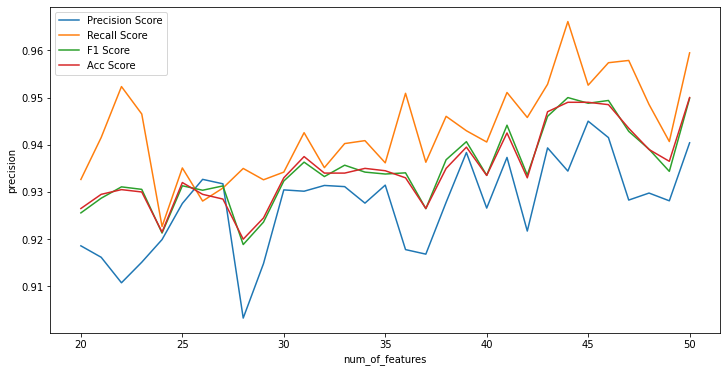

In [ ]:
sns.lineplot(x='num_of_features', y='precision', data=df, label='Precision Score')
sns.lineplot(x='num_of_features', y='recall', data=df, label='Recall Score')
sns.lineplot(x='num_of_features', y='f1_score', data=df, label='F1 Score')
sns.lineplot(x='num_of_features', y='accuracy', data=df, label='Acc Score')

# Training Cattboost Classifier on GPU

It is the same method as logistic reg, the only diff is that we are now using random forest classifier for training and trying to beat the logistic baseline

In [ ]:
from catboost import CatBoostClassifier

In [ ]:
def train_clf(data, top_n):
    top_n_features = mi_scores.sort_values(ascending=False).head(top_n).index.tolist()
    X = data[top_n_features]
    y = data['labels']
    
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=True)
    
    

    clf = CatBoostClassifier(iterations=200,learning_rate=0.1)
    
    clf.fit(X_train, y_train,verbose=False)

    
    y_pred = clf.predict(X_test)
    
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    accuracy = accuracy_score(y_test, y_pred)
    
    return precision, recall, f1, accuracy

In [ ]:
arr = []
for i in range(20,51,1):
    precision, recall, f1, accuracy = train_clf(data, i)
    print("Performance for clf Model with Top {} features is precision : {}, recall : {}, f1 score : {}, accuracy : {}".format(i, precision, recall, f1, accuracy))
    arr.append([i, precision, recall, f1, accuracy])

Performance for clf Model with Top 20 features is precision : 0.9806320081549439, recall : 0.9876796714579056, f1 score : 0.9841432225063939, accuracy : 0.9845
Performance for clf Model with Top 21 features is precision : 0.9761904761904762, recall : 0.9915878023133544, f1 score : 0.983828899321857, accuracy : 0.9845
Performance for clf Model with Top 22 features is precision : 0.9869739478957916, recall : 0.9879638916750251, f1 score : 0.987468671679198, accuracy : 0.9875
Performance for clf Model with Top 23 features is precision : 0.9805327868852459, recall : 0.9825462012320328, f1 score : 0.9815384615384616, accuracy : 0.982
Performance for clf Model with Top 24 features is precision : 0.9823874755381604, recall : 0.9833496571988247, f1 score : 0.9828683308859519, accuracy : 0.9825
Performance for clf Model with Top 25 features is precision : 0.9889558232931727, recall : 0.9830339321357285, f1 score : 0.985985985985986, accuracy : 0.986
Performance for clf Model with Top 26 feature

In [ ]:
df = pd.DataFrame(arr, columns=['num_of_features', 'precision', 'recall', 'f1_score', 'accuracy'])
df

,num_of_features,precision,recall,f1_score,accuracy
0,20,0.980632,0.987680,0.984143,0.9845
1,21,0.976190,0.991588,0.983829,0.9845
2,22,0.986974,0.987964,0.987469,0.9875
3,23,0.980533,0.982546,0.981538,0.9820
4,24,0.982387,0.983350,0.982868,0.9825
5,25,0.988956,0.983034,0.985986,0.9860
6,26,0.979592,0.974855,0.977218,0.9765
7,27,0.978395,0.986515,0.982438,0.9830
8,28,0.981336,0.986180,0.983752,0.9835
9,29,0.984955,0.985944,0.985449,0.9855


# Visualize CatBoostClassifier Performance

Our goal is to beat logistic regression baseline which is

* accuracy = 0.947162
* precision = 0.957468
* recall = 0.952287
* f1_score = 0.9515

Therefore, by looking at the image below, we can see that 32 features would be the ideal quantity for this model, which is one fewer than logistic regression. I chose 32 features since it was the number that gave the model the best performance across all evaluation metrics.

<AxesSubplot:xlabel='num_of_features', ylabel='precision'>

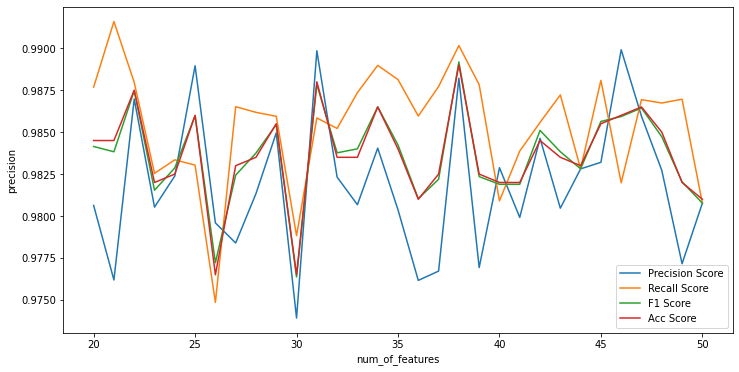

In [ ]:
sns.lineplot(x='num_of_features', y='precision', data=df, label='Precision Score')
sns.lineplot(x='num_of_features', y='recall', data=df, label='Recall Score')
sns.lineplot(x='num_of_features', y='f1_score', data=df, label='F1 Score')
sns.lineplot(x='num_of_features', y='accuracy', data=df, label='Acc Score')

# Final CatBoostClassifier Model

Lets train the final CatBoostClassifier based on the optimal N number of features

In [ ]:
top_n_features = mi_scores.sort_values(ascending=False).head(51).index.tolist()
X = data[top_n_features]
y = data['labels']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=True)

clf = CatBoostClassifier(loss_function='Logloss',
                         verbose = False,
                        eval_metric='AUC',
                        iterations=500,
                         thread_count = None,
                        random_state=1)
    
clf.fit(X_train, y_train,verbose=False)


y_pred = clf.predict(X_test)

precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
accuracy = accuracy_score(y_test, y_pred)

print("Performance for RFC Model with Top {} features is precision : {}, recall : {}, f1 score : {}, accuracy : {}".format(27, precision, recall, f1, accuracy))

Performance for RFC Model with Top 27 features is precision : 0.9817444219066938, recall : 0.9877551020408163, f1 score : 0.9847405900305187, accuracy : 0.985


# Performance

The model is now capable of predicting at up to 98% accuracy and also precision and recall, this shows the model has high confidence in predicting phishing or non-phishing site

In [ ]:
from sklearn.metrics import classification_report

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.99      0.98      0.99      1020
           1       0.98      0.99      0.98       980

    accuracy                           0.98      2000
   macro avg       0.98      0.99      0.98      2000
weighted avg       0.99      0.98      0.99      2000



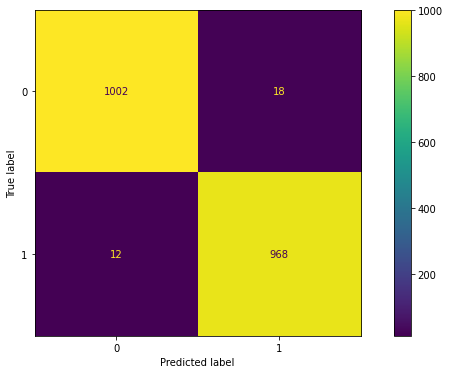

In [ ]:
# importing modules
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
# <a href="https://techfor-today.com/sklearn-confusion-matrix-in-machine-learning/">confusion matrix</a> plotting
cm = confusion_matrix(y_test, y_pred, labels=clf.classes_)
# labelling
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=clf.classes_)
disp.plot()
plt.show()